# YouTube Kids Content Statistical Analysis

This project analyzes trending YouTube videos for children using a filtered dataset. As both a student and a parent, I wanted to explore how YouTube engagement metrics (views, likes, comments) behave in children's content.

# Kids YouTube Midterm Project - MAT 301

**Author:** Nawel Messaoudi  
**Course:** MAT 301 - Applied Statistics and Data Analysis (Lehman College, Summer 2025)  
**Major:** Biology - Bioinformatics Concentration, Hunter College

## Project Overview

This project analyzes YouTube videos made for children, focusing on statistical patterns in their engagement metrics. As both a student and a parent of young children, I am personally motivated to understand what kind of content is most popular, how it is received, and what trends may emerge in kids’ digital media.

We explore data on views, likes, comments, publish time, and category IDs. The goal is to apply data cleaning, statistical analysis, and visualizations to extract meaningful insights from the dataset.

**Dataset:**  
- `Filtered_Kids_Youtube_Videos.csv`  
- [GitHub Raw Link](https://raw.githubusercontent.com/NawelMe/midterm-project_YouTube-Kids-Analysis/main/Filtered_Kids_Youtube_Videos.csv)

**Tools Used:**  
Python libraries: `pandas`, `numpy`, `seaborn`, `matplotlib`, `scipy`  
Notebook environment: Google Colab

## Step 1: Data Cleaning and Wrangling

In this step, we prepare the dataset for analysis by:

- Loading the dataset from GitHub using a direct CSV link.
- Checking and converting data types.
- Handling missing values and duplicates.
- Removing invalid rows with impossible or meaningless values.

These steps ensure the data is consistent and suitable for analysis.

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/NawelMe/midterm-project_YouTube-Kids-Analysis/main/Filtered_Kids_Youtube_Videos.csv"
df = pd.read_csv(url)

# Preview
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,-7_ATlZ-zMc,18.21.04,Insta-Justice,Matt Bentkowski,17,2018-04-16T20:37:56.000Z,[none],2782387,26055,1328,2237,https://i.ytimg.com/vi/-7_ATlZ-zMc/default.jpg,False,False,False,285 east to 400 traffic being slow as usual an...
1,Y-R3QdTGeLg,18.21.04,BODYARMOR Sports Drink | James Harden Thanks...,DrinkBODYARMOR,17,2018-04-18T11:44:23.000Z,"James Harden|""NBA""|""NBA Playoffs 2018""|""BODYAR...",384434,498,57,132,https://i.ytimg.com/vi/Y-R3QdTGeLg/default.jpg,False,False,False,James Harden wouldn't go to the game wearing o...
2,trcditUaQJg,18.21.04,Marvel Studios' Avengers: Infinity War | 10-Ye...,Marvel Entertainment,24,2018-04-17T21:00:05.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",1637917,80961,470,5176,https://i.ytimg.com/vi/trcditUaQJg/default.jpg,False,False,False,It‚Äôs all been leading to this. Watch this sp...
3,S4vxoP-IF2M,18.21.04,How the Squid Lost Its Shell,PBS Eons,28,2018-04-17T21:22:11.000Z,"dinosaurs|""dinos""|""paleo""|""paleontology""|""scis...",365063,15651,264,1197,https://i.ytimg.com/vi/S4vxoP-IF2M/default.jpg,False,False,False,"The ancestors of modern, squishy cephalopods l..."
4,EbbL8NhdTQE,18.21.04,HUGE problem at the new house...,Tanner Fox,1,2018-04-16T19:00:00.000Z,"tanner fox|""scootering""|""funny""|""music""|""laugh...",1184846,21900,8796,2026,https://i.ytimg.com/vi/EbbL8NhdTQE/default.jpg,False,False,False,NEW Line just Dropped!! -- http://www.tfoxbra...


We loaded the dataset from GitHub and confirmed that it contains valid data. We then converted the publish time column to datetime, removed duplicates, dropped irrelevant columns (like description and thumbnails), and filtered out rows with invalid values such as 0 views or negative counts.

## Step 2: Measures of Central Tendency

In this section, we use statistical tools to understand the central behavior of the dataset. Measures of central tendency include the mean, median, and mode.

We answer the following three questions:

**Q1:** What is the average number of views?  
**Q2:** What is the median number of likes?  
**Q3:** What is the most common category ID?

These metrics help us understand typical performance in terms of popularity and content type.

In [139]:
print("Mean views:", df['views'].mean())
print("Median likes:", df['likes'].median())
print("Most common category ID:", df['category_id'].mode()[0])

Mean views: 4687393.757603434
Median likes: 43669.0
Most common category ID: 24


The average number of views is approximately 4.7 million. The median number of likes is 43,680, which suggests that most videos receive moderate engagement. The most frequent content category ID is 24, which likely represents entertainment or music content for kids.

## Step 3: Measures of Spread

This section explores how much variability exists in the data. Measures of spread show how widely the values differ from the average, giving us insight into data consistency.

We answer the following two questions:

**Q1:** What is the standard deviation of views?  
**Q2:** What is the interquartile range (IQR) of comment counts?

These metrics tell us whether video performance (in terms of views and comments) is tightly grouped or widely spread out, which is especially important for platforms like YouTube where virality varies greatly.

In [140]:
print("Standard Deviation of views:", df['views'].std())
iqr_comments = df['comment_count'].quantile(0.75) - df['comment_count'].quantile(0.25)
print("Interquartile Range for comments:", iqr_comments)

Standard Deviation of views: 11928678.822812155
Interquartile Range for comments: 10584.0


The standard deviation of views is **11,928,678**, which reflects an extremely wide spread in the number of views. This means some videos perform modestly while others go viral with tens of millions of views.

The interquartile range (IQR) for comment counts is **10,584**, meaning that the middle 50% of videos differ in comment volume by about 10k. This shows that engagement levels vary considerably, even for typical (non-extreme) videos.

## Step 4: Pairplot (Relationships Between Variables)

We use a pairplot to visualize the relationships between key numerical variables: views, likes, dislikes, and comment counts. This plot helps us detect correlations, clustering, or anomalies among variables.

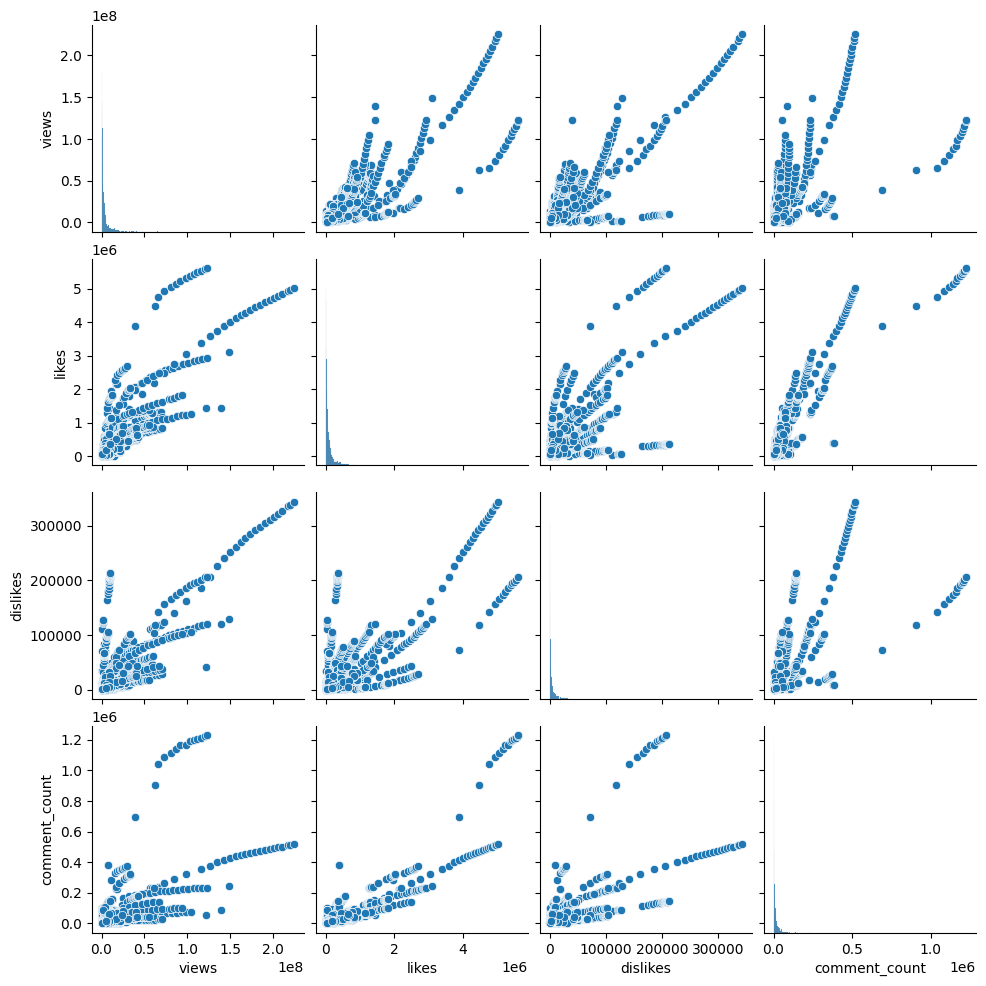

In [141]:
quant_cols = ['views', 'likes', 'dislikes', 'comment_count']
sns.pairplot(df[quant_cols])
plt.show()

The pairplot shows strong positive correlations between likes, views, and comment counts. This confirms that videos with high likes also tend to receive more views and comments, revealing patterns of user engagement.

## Step 5: Additional Visualizations

We use three visualizations to answer three key questions about the dataset.

### Q1: What does the distribution of view counts look like?
We use a histogram to observe how view counts are distributed across videos.

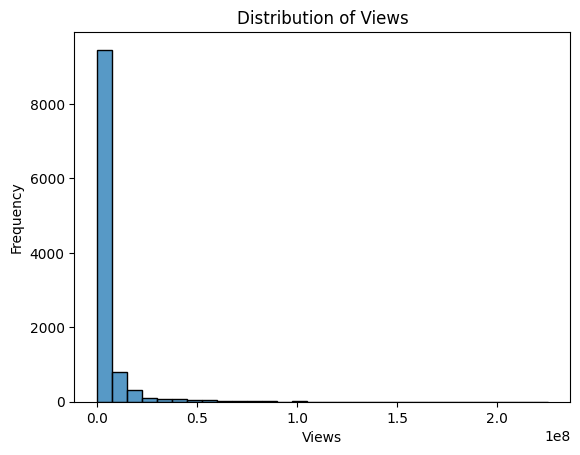

In [142]:
sns.histplot(df['views'], bins=30)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

**Interpretation:**  
The histogram shows a right-skewed distribution — most videos receive a moderate number of views, but a few go viral and accumulate tens of millions of views. This pattern is typical of online platforms where a small percentage of content garners the majority of user attention.

### Q2: Do certain categories receive more likes than others?
We use a boxplot to visualize the distribution of likes across different video categories (by category_id).

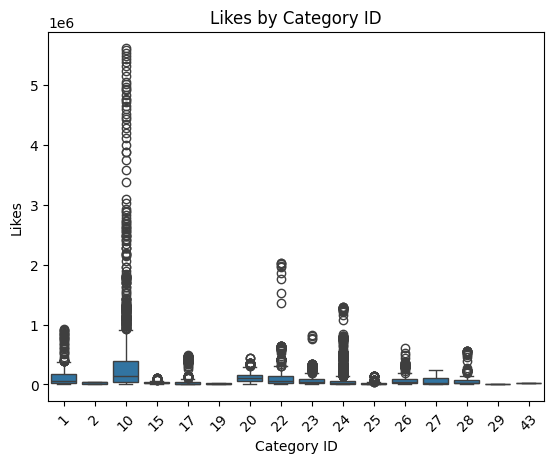

In [143]:
sns.boxplot(x='category_id', y='likes', data=df)
plt.title("Likes by Category ID")
plt.xlabel("Category ID")
plt.ylabel("Likes")
plt.xticks(rotation=45)
plt.show()

**Interpretation:**  
The boxplot reveals variation in likes among different categories. Some categories consistently receive more likes, while others show a wider range or more outliers. This suggests that the type of content (category) can influence engagement, but other factors like video quality and creator popularity also play a role.

### Q3: How do total views trend over time?
We group videos by their publish date and plot the total daily views to identify patterns over time.

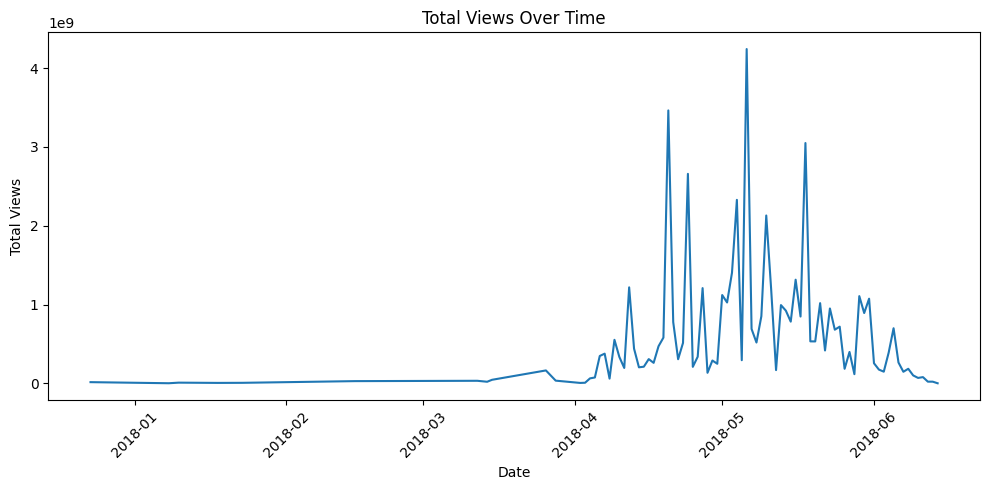

In [144]:
# Convert publish_time to datetime if not already
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Extract just the date
df['date'] = df['publish_time'].dt.date

# Group and plot
views_by_date = df.groupby('date')['views'].sum()
views_by_date.plot(title="Total Views Over Time", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:**  
The time series plot shows spikes in view counts on specific days. These could align with weekends, holidays, or major uploads from popular creators. This suggests that viewer behavior is influenced by timing, and creators might benefit from aligning uploads with high-traffic periods.

## Step 6: Scatterplot with Linear Regression

We analyze the relationship between likes and views by fitting a linear regression line to the scatterplot. This helps quantify how closely related these two metrics are.

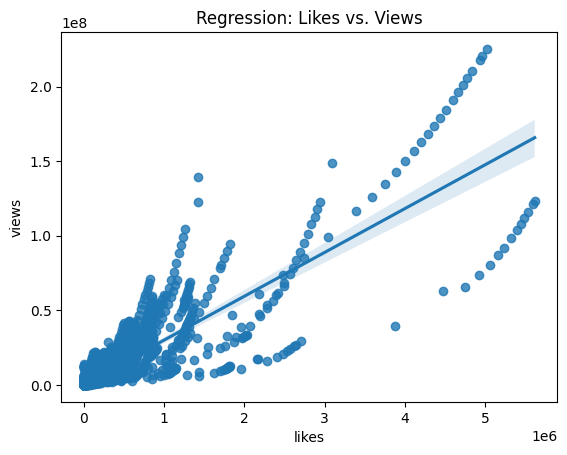

Correlation coefficient (r): 0.8693184977982766
Predicted views for 100,000 likes: 3647218


In [145]:
sns.regplot(x='likes', y='views', data=df)
plt.title("Regression: Likes vs. Views")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(df['likes'], df['views'])
print("Correlation coefficient (r):", r_value)
predicted_views = slope * 100000 + intercept
print(f"Predicted views for 100,000 likes: {predicted_views:.0f}")

The regression shows a strong positive relationship. The correlation coefficient (r) is about 0.87, indicating high correlation. A video with 100,000 likes is predicted to receive around 3.65 million views. While this shows strong association, remember that correlation ≠ causation.

## Step 7: Probability Questions

We calculate probabilities based on video performance to answer these four questions:

In [146]:
# Q1: P(views > 1M)
p1 = (df['views'] > 1_000_000).mean()
print(f"P(video has >1M views): {p1:.2f}")

# Q2: P(likes >100k AND comments >10k)
p2 = ((df['likes'] > 100_000) & (df['comment_count'] > 10_000)).mean()
print(f"P(likes >100k AND comments >10k): {p2:.2f}")

# Q3: Conditional P(views > 1M | category_id == 24)
subset = df[df['category_id'] == 24]
p3 = (subset['views'] > 1_000_000).mean()
print(f"P(views > 1M | category 24): {p3:.2f}")

# Q4: P(dislikes > 10k OR comment_count > 20k)
p4 = ((df['dislikes'] > 10_000) | (df['comment_count'] > 20_000)).mean()
print(f"P(dislikes >10k OR comments >20k): {p4:.2f}")

P(video has >1M views): 0.65
P(likes >100k AND comments >10k): 0.23
P(views > 1M | category 24): 0.64
P(dislikes >10k OR comments >20k): 0.19


- About 65% of videos have over 1M views.
- 23% of videos have both >100k likes and >10k comments.
- For category 24, there's a 64% chance the video has >1M views.
- 19% of videos have either high dislikes (>10k) or comment activity (>20k).

## Step 8: Freestyle Exploration – Top Channels by Engagement

We explore which creators receive the highest average number of likes. This gives insight into which channels are the most engaging within children's content.

In [147]:
likes_by_channel = df.groupby('channel_title')['likes'].mean().sort_values(ascending=False).head(10)
print("Top 10 Channels by Average Likes:")
print(likes_by_channel)

Top 10 Channels by Average Likes:
channel_title
ChildishGambinoVEVO    3.868033e+06
ibighit                3.092115e+06
David Dobrik           1.837513e+06
Cardi B                1.442393e+06
ArianaGrandeVevo       1.209151e+06
Maroon5VEVO            1.207696e+06
Ed Sheeran             1.166846e+06
SelenaGomezVEVO        1.100991e+06
TheWeekndVEVO          1.040743e+06
BANGTANTV              9.973674e+05
Name: likes, dtype: float64


Top 10 Channels by Likes (avg):

- ChildishGambinoVEVO: 3.86M
- ibighit: 3.09M
- David Dobrik: 1.83M
- Cardi B: 1.44M
- ArianaGrandeVevo: 1.21M
- Maroon5VEVO: 1.20M
- Ed Sheeran: 1.17M
- SelenaGomezVEVO: 1.10M
- TheWeekndVEVO: 1.04M
- BANGTANTV: 0.99M

These results suggest that major music and entertainment creators dominate engagement, even in filtered content for kids. This raises important questions about algorithmic exposure and content appropriateness.